In [1]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
G = nx.DiGraph()
G.add_node(0)
G.add_weighted_edges_from([(0,1,2),(0,2,4),(0,4,-2),(0,5,1),(0,6,5),
                          (2,3,3),(2,4,2),(3,8,-4),(4,3,5),(4,8,1),(4,7,2),(5,7,-1),
                          (5,8,-3),(6,7,6),(7,8,2)])

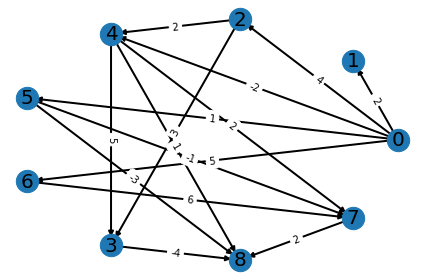

In [3]:
plt.tight_layout()
pos = nx.drawing.layout.circular_layout(G,scale=10)
# nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# edges
nx.draw_networkx_edges(G, pos, width=2)

edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
# labels
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.003)
plt.axis("off")
plt.tight_layout()
plt.show()

# Tasks

In [4]:
nx.is_directed_acyclic_graph(G)

True

# Print the vertex ​(​V)​ ​ reachable by the greatest number of paths from the source vertex 0.

In [5]:
def get_most_reachable(G, verbose = True):
    champion = 0
    champion_paths = 0
    n = len(list(nx.descendants(G,0)))+1
    for i in range(0,n):
        competitor = i
        competitor_paths = None
        competitor_paths = len(list(nx.ancestors(G,i)))
        if competitor_paths > champion_paths:
            champion = competitor
            champion_paths = competitor_paths
        else:
            continue
    
    if verbose: print(f"Most reachable node: {champion} with {champion_paths} paths")
    return champion
    
get_most_reachable(G)

Most reachable node: 8 with 7 paths


8

# Sort and print those paths according to their cost (descending).

In [6]:
edges=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
edges

[(3, 8, {'weight': -4}),
 (5, 8, {'weight': -3}),
 (0, 4, {'weight': -2}),
 (5, 7, {'weight': -1}),
 (0, 5, {'weight': 1}),
 (4, 8, {'weight': 1}),
 (0, 1, {'weight': 2}),
 (2, 4, {'weight': 2}),
 (4, 7, {'weight': 2}),
 (7, 8, {'weight': 2}),
 (2, 3, {'weight': 3}),
 (0, 2, {'weight': 4}),
 (0, 6, {'weight': 5}),
 (4, 3, {'weight': 5}),
 (6, 7, {'weight': 6})]

# Introduce an additional vertex (V') that satisfies the following conditions:

    a. (V') is now the most reachable vertex (instead of V).
    b. None of the vertices which share an edge with V share an edge with V'

In [7]:
def get_most_reachable_paths(G):
    ancestors = []
    vertex = []
    n = len(list(nx.descendants(G,0)))+1
    for i in range(0,n):
        ancestors.append(len(list(nx.ancestors(G,i))))
        vertex.append(i)
    df = pd.DataFrame({"Vertex":vertex, "nancestors":ancestors}).sort_values(
        "nancestors", ascending = False).reset_index(drop = True)
    return df.Vertex.to_list()

In [8]:
# a.
def create_new_most_reachable(G):
    G1 = G.copy()
    most_reachables = get_most_reachable_paths(G)[:3]
    new_vertex = list(nx.descendants(G,0))[-1]+1
    w = []
    for i in range(len(edges)): w.append(edges[i][2]["weight"])
    for i in most_reachables: G1.add_weighted_edges_from([(i,new_vertex,random.randint(w[0],w[-1]))])
    assert get_most_reachable(G1) == new_vertex
    return G1

G1 = create_new_most_reachable(G)

Most reachable node: 9 with 8 paths


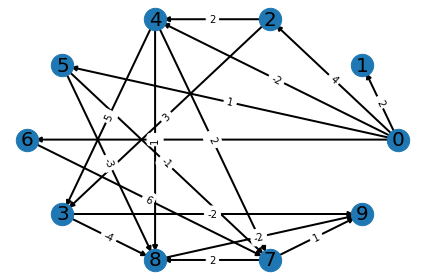

In [9]:
plt.tight_layout()
pos = nx.drawing.layout.circular_layout(G1,scale=10)
# nodes
nx.draw_networkx_nodes(G1, pos, node_size=500)

# edges
nx.draw_networkx_edges(G1, pos, width=2)

edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G1.edges(data=True)])
# labels
nx.draw_networkx_edge_labels(G1,pos,edge_labels=edge_labels)
nx.draw_networkx_labels(G1, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.003)
plt.axis("off")
plt.tight_layout()
plt.show()

In [10]:
# b. None of the vertices which share an edge with V share an edge with V'
def create_most_reachable_B(G):
    new_vertex = list(nx.descendants(G,0))[-1]+1
    G1 = G.copy()
    blocked = list(nx.ancestors(G1,8))
    most_reachables = [i for i in get_most_reachable_paths(G1) if i not in blocked]
    w = []
    for i in range(len(edges)): w.append(edges[i][2]["weight"])
    for i in most_reachables: G1.add_weighted_edges_from([(i,new_vertex,random.randint(w[0],w[-1]))])
    if get_most_reachable(G1, verbose = False) == new_vertex:
        c = sorted(G1.edges(data=True), key=lambda t: t[2].get('weight', 1))
        for i in list(range(len(c))):
            print('{%s,%s,%s}' %(c[i][0],c[i][1],c[i][2]["weight"]))
        return G1
    else:
        raise Exception("not enough paths for %s to become most reachable" % new_vertex)

G2 = create_most_reachable_B(G)
get_most_reachable(G2)

{3,8,-4}
{5,8,-3}
{0,4,-2}
{5,7,-1}
{0,5,1}
{4,8,1}
{0,1,2}
{2,4,2}
{4,7,2}
{7,8,2}
{2,3,3}
{0,2,4}
{1,9,4}
{8,9,4}
{0,6,5}
{4,3,5}
{6,7,6}
Most reachable node: 9 with 9 paths


9